In [1]:
!pip install keras-tuner

In [2]:

import pandas as pd
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import matplotlib.pyplot as plt


In [3]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:

from keras.models import Sequential

In [5]:
from keras.utils import to_categorical
import random

In [6]:
#train_labels = to_categorical(train_labels, num_classes=10)
#test_labels = to_categorical(test_labels, num_classes=10)
#label_index

In [7]:
train_images = train_images / 255
test_images = test_images/255

In [8]:
#test_images.shape #So we can see that this is an rgb image.. which has three channels.. so let's visualize some samples of the image
#train_images.reshape(len(train_images), 224, 224, 3)
#test_images.reshape(len(test_images), 224, 224, 3)

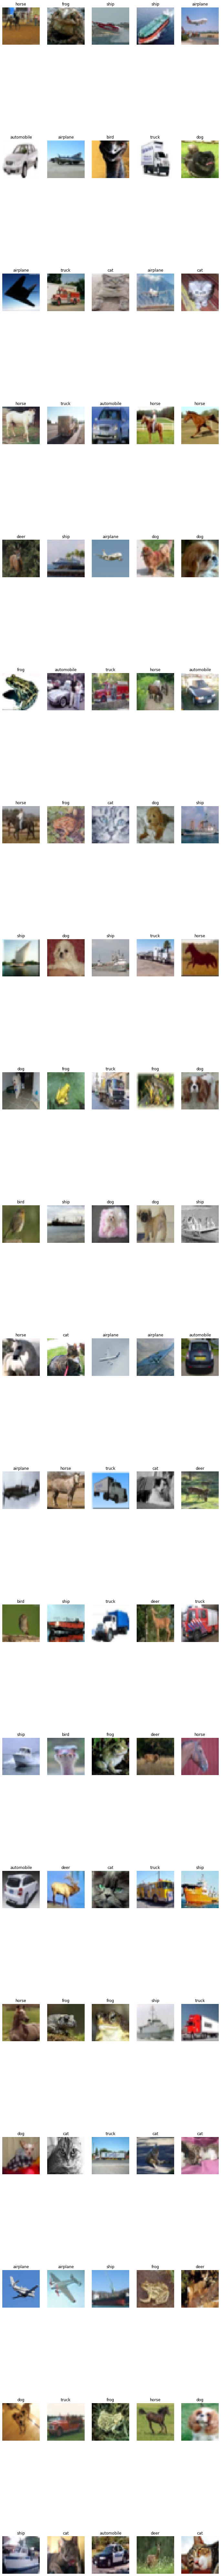

In [9]:
#let's visualize 100 samples
rows=20 #rows in subplots
cols=5 #columns in subplots
samp = random.sample(range(train_images.shape[0]),rows*cols) #selecting 100 random samples
image_samples = train_images[samp,:,:,:]
label_samples = train_labels[samp]

fig,ax = plt.subplots(rows,cols,figsize=(12,150))
r = 0
c = 0
class_labels = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(rows*cols):
    
    aa = image_samples[i,:,:,:].reshape(32,32,3)
    ax[r,c].axis("off")
    ax[r,c].imshow(aa,cmap="gray")
    label_index = int(label_samples[i])
    ax[r,c].set_title(class_labels[label_index])
    

    c+=1
    if c == cols:
        c=0
        r += 1
plt.show()

In [10]:
#let's proceed to our model.
data_gen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
val_datagen = ImageDataGenerator()


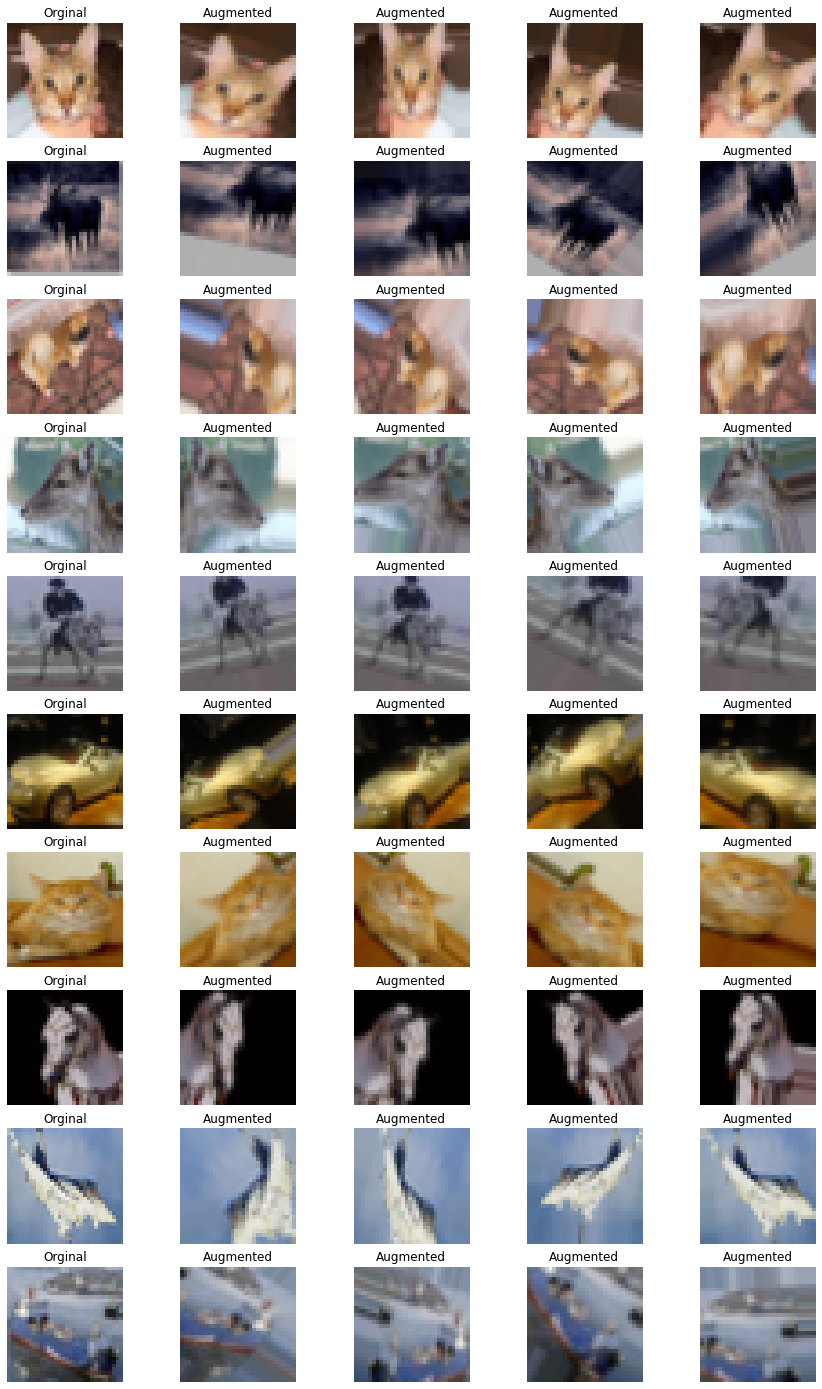

In [11]:
#So now let's show an original image with the transformed images
#this will go like this , we'll have 10 rows of images.. as original images.. then .. we'll now have range of 5 images in total.in a row


fig, ax = plt.subplots(10 , 5 , figsize = (15,25))
for n in range(10):
  samp = random.sample(range(train_images.shape[0]), 1)[0]
  ax[n,0].imshow(train_images[samp].reshape(32,32,3),cmap = 'gray')
  ax[n,0].set_title('Orginal')
  ax[n,0].axis('off')
  for i in range(1,5):
    ax[n,i].imshow(data_gen.random_transform(train_images[samp]).reshape(32,32,3), cmap = 'gray')
    ax[n,i].set_title('Augmented')
    ax[n,i].axis('off')
plt.show()


In [12]:
#Let's try and use vgg16.. which i hope will improve the model accuracy



In [13]:
from keras.applications.vgg16 import VGG16
from glob import glob
from keras.layers import Input, Flatten, Dense, Lambda
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential #vgg is also a sequential model

In [14]:
IMAGE_SIZE = [32, 32]
vgg_model = VGG16(include_top=False, weights = 'imagenet',input_tensor=Input(shape= (32,32,3)))

In [15]:
for layer in vgg_model.layers:
  layer.trainable = False

In [16]:
x = Flatten()(vgg_model.output)
predictions = Dense(units = 10, activation = 'softmax')(x)

In [17]:
model_history = Model(inputs = vgg_model.input, outputs = predictions)

In [18]:
model_history.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [19]:
model_history.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
training_set = data_gen.flow(train_images, train_labels,seed = 11)

In [20]:
testing_set = val_datagen.flow(test_images, test_labels, seed = 11)

In [21]:
model = model_history.fit(training_set, steps_per_epoch=len(training_set), epochs = 20, validation_data=testing_set, validation_steps=len(testing_set))


Epoch 1/20
1563/1563 [==============================] - 33s 19ms/step - loss: 111.7283 - accuracy: 0.0022 - val_loss: 110.6857 - val_accuracy: 0.0124
Epoch 2/20
1563/1563 [==============================] - 29s 19ms/step - loss: 110.8315 - accuracy: 0.0027 - val_loss: 110.3220 - val_accuracy: 0.0158
Epoch 3/20
1563/1563 [==============================] - 29s 19ms/step - loss: 110.5348 - accuracy: 0.0038 - val_loss: 110.0234 - val_accuracy: 0.0185
Epoch 4/20
1563/1563 [==============================] - 30s 19ms/step - loss: 110.7038 - accuracy: 0.0043 - val_loss: 109.7216 - val_accuracy: 0.0224
Epoch 5/20
1563/1563 [==============================] - 30s 19ms/step - loss: 109.3642 - accuracy: 0.0059 - val_loss: 109.4939 - val_accuracy: 0.0271
Epoch 6/20
1563/1563 [==============================] - 30s 19ms/step - loss: 109.6961 - accuracy: 0.0062 - val_loss: 109.2595 - val_accuracy: 0.0306
Epoch 7/20
1563/1563 [==============================] - 29s 19ms/step - loss: 109.4420 - accuracy: 0

Text(0.5, 1.0, 'Trend Showing Loss along with epochs')

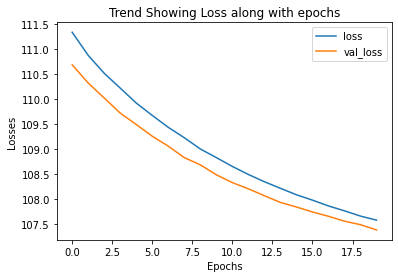

In [23]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['loss', 'val_loss'], loc = 'best')
plt.title('Trend Showing Loss along with epochs')

In [31]:
predictions = model_history.predict(testing_set, steps = len(testing_set))

In [35]:
predictions.shape

(10000, 10)

In [34]:
train_images.shape

(50000, 32, 32, 3)

In [38]:
model_history.save('Cifar10_Model.h5')